---
> 盗人には網を張れ\
> そのデータを学習するにも網を張れ
---

# ニューラルネットワークの基礎

より一般的なのは、全結合層(Full connected layer)、つまり、全てのノードが次の層のすべてのノードに繋がっている形態であるが、画像認識などに用いられる Convolutional Neural Network (CNN) や、自然言語処理などに用いられる Recurrent Neural Network (RNN) など様々な種類が提案されている

最初に全結合型と呼ばれるニューラルネットワークの構造について説明し、複数の入力データと望ましい出力の組からなる学習用データセットを用いてどのように学習させるのかについて説明する

- これには、ニューラルネットワークによって表現される複雑な関数を、現実的な時間で学習するための誤差逆伝播法（バックプロパゲーション）と呼ばれるアルゴリズムを用いる



## ニューラルネットワーク(NN)の構造

NNの構造を図式化すると次のようなイメージとなる

- 例えば、赤ワインと白ワインを分けるNNの設計について考える
  - 入力変数は{年数，アルコール度数，色合い，匂い}の4変数とする
  - 出力変数は{白ワイン，赤ワイン}の2変数とする

<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-01.png">

-  図のように**ノード**もしくは**ユニット**が**層**を成して結合した構造を有する

-  一番初め(左)の層を**入力層（input layer）**，最後の層(右)を**出力層（output layer）**、それ以外を**中間層（intermediate layer）** もしくは **隠れ層（hidden layer）** と呼ぶ

- 中間層の数は問題に応じて0層も含めて自由に設定できる

- この例では各層間の全てのノードが互いに結合されており、**全結合型のニューラルネットワーク**と呼ばれる基本形である

ここに、年数が3年物でアルコール度数が14度、色合いが0.2、匂いが0.8で表されるワインがあるとする

- このようなデータを上記NNに与えたとき、結果として得られる値に着目したとき、白ワイン $y_{1} = 0.15$, 赤ワイン $y_{2}= 0.85$ となったとする

<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-02.png">

- このとき、出力値の中で最も大きな値となっている変数に対応するクラス、すなわち「赤ワイン」をこの分類問題におけるこのニューラルネットワークの**予測結果**とする

- ここで出力層のすべての値を合計すると1になっていることに注意する\
これは、自然とそうなるのではなく、狙ってあたかも出力層のそれぞれのノードが持つ数値が各クラスに属している確率を表しているかのように、特に出力層においてはsoftmaxを用いて表現しているからである

- また、一般にカテゴリ数と同数のノードが出力層に必要である

次に、ニューラルネットワークの内部で行われる計算について述べる

- ニューラルネットワークの各層は、前の層の値に線形変換と非線形変換を順番に施して計算を進めている

### 線形変換

<img src="http://class.west.sd.keio.ac.jp/dataai/text/linear_transformation.png" width=300>

ここで言う線形変換とは、重み行列 ($w$) $\times$ 入力ベクトル ($h$) $+$ バイアスベクトル ($b$) といった計算を意味する

- この変換の入力が$h$、パラメータが$w$と$b$である

  - 以下では入力層（上図における $x_1, x_2, x_3, x_4$）を0層目の隠れ層と数えて、 $h_{01}, h_{02}, h_{03}, h_{04}$ と表記する
  - $h$は積和を計算することから、$\sigma$と表記されることも多い

  - なお、数学では線形変換は ${\bf w} \times {\bf h}$ といった変換を意味し、ここで述べた$w \times h + b$という変換は厳密には**アファイン変換(もしくはアフィン変換)**と呼ばれる
    - 深層学習の文脈ではこの変換も**線形変換**と呼ぶことが多い

この行列演算およびその展開式は次のようになる

- 式におけるバイアス（$b_1, b_2, b_3$）は上図では省略されている

**行列式**

$$
\begin{aligned}
\begin{bmatrix}
u_{11} \\
u_{12} \\
u_{13}
\end{bmatrix}&=\begin{bmatrix}
w_{11} & w_{12} & w_{13} & w_{14} \\
w_{21} & w_{22} & w_{23} & w_{24} \\
w_{31} & w_{32} & w_{33} & w_{34}
\end{bmatrix}\begin{bmatrix}
h_{01} \\
h_{02} \\
h_{03} \\
h_{04}
\end{bmatrix}&+&\begin{bmatrix}
b_{1} \\
b_{2} \\
b_{3}
\end{bmatrix}\\
\\
{\bf u}_{1}&={\bf W}{\bf h}_{0}&+&{\bf b}
\end{aligned}
$$

**展開式**

$$
\begin{aligned}
u_{11}&=w_{11}h_{01}+w_{12}h_{02}+w_{13}h_{03}+w_{14}h_{04}+b_{1} \\
u_{12}&=w_{21}h_{01}+w_{22}h_{02}+w_{23}h_{03}+w_{24}h_{04}+b_{2} \\
u_{13}&=w_{31}h_{01}+w_{32}h_{02}+w_{33}h_{03}+w_{34}h_{04}+b_{3}
\end{aligned}
$$

${\bf W}$ および ${\bf b}$ についても、どの層とどの層の間の計算に用いるかを明確にするため添え字をつけるべきであるが、ここでは省略している

### 非線形変換

線形変換のみでは、次の左図のような場合は関係を表現できるが、右のような場合は適切に表現できない。

<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-04.png" width=300>

そこで、各層で線形変換に引き続いて非線形変換を施すことで全体の関数が非線形性を持つようにする

- このように線形であれ非線形であれ、ノードにおいて何かしらの変換を行う関数を**活性化関数** と呼ぶ

上図の線形変換の結果 $u_{11}, u_{12}, u_{13}$ に活性化関数を使って非線形変換を行った結果を $h_{11}, h_{12}, h_{13}$ とし、これらを活性値(activation)と呼ぶ
- これが次の層への入力となる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/activation.png" width=300>

## 活性化関数と損失関数

活性化関数とは
- ニューロンの興奮/抑制状態を決める関数
- 関数への入力を、興奮/抑制状態を表す値に変換

損失関数（誤差関数）

- 出力と正解の間の「誤差」を定義する関数



## 活性化関数

- ReLU関数(ランプ関数)
 - 比較的新しく、多層では最もよく利用される活性化関数
 - シンプルで演算が高速、正の入力値では微分値が1固定で入力に応じて値を大きくできるため勾配消失が起こりにくい
 - 多層であるDNNでは特に重要だが、以下の欠点がある
   - x=0で不連続微分不可能であることを基本的に無視
   - 負の場合は収束しにくい

<img src="http://class.west.sd.keio.ac.jp/dataai/text/act-relu.png" width=300>

- シグモイド関数=$\frac{1}{1+e^{−𝑎𝑥}}$
 - 誤差逆伝播法が登場した当初よく利用されていた
 - 今は狙って使われるだけで一般的ではなくなった
 - 極端に大きい・小さい入力に対して応答が悪く、微分の最大値が0.25のため多層では勾配消失の問題が発生、計算量も大きめ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/act-sigmo.png" width=300>

- tanh関数
 - 微分の最大値が1のため勾配消失の問題を解決しやすい
 - 極端に大きい・小さい入力での微分が0となる問題が残っている
 - 計算量も多め

<img src="http://class.west.sd.keio.ac.jp/dataai/text/act-tanh.png" width=300>

- Linear関数
 - 線形関数や恒等関数と呼ばれ、要するに𝑦=𝑥という関数で入力そのまま出力するなにもしない関数
 - 活性化関数には非線形性が必要であるということを示すためにあるようなもので、普通は利用しない
   - 最終層などで広い値の範囲を得たい時などに利用

<img src="http://class.west.sd.keio.ac.jp/dataai/text/act-eq2.png" width=300>

- logistic関数=$\frac{𝐴}{1+e^{−𝑎(𝑥−𝑥_0)}}$
 - シグモイド関数がパラメータで曲線の形しか変えられないのに対し、さらにパラメータで平行移動させることができる
 - 分類問題の回帰手法 (最尤推定を行う)に用いることが多い
 - 常に出力が0と1の間に入るので、確率と関係させて物事を考えることができる

 - 計算は多め


- softmax関数
 - 常に出力が0と1の間に入るため確率と関係させることができる
 - 他の値と比べて目立った値ほど1に近づき、また総和が1になるため、最終的な「判断結果の確率指標」として利用される
 - 計算は多め

<img src="http://class.west.sd.keio.ac.jp/dataai/text/act-softmax.png" width=300>


### 数値を見ながら計算の流れを確認

下図のような具体的な数値を用いて、入力 $x_1, x_2, x_3$ から出力 $y$ を求める過程について確認する

- 計算を簡略化するためバイアス ${\bf b}$ の計算は省略する

- すなわち、バイアスは全て0とする。数値例として，${\bf x} = \begin{bmatrix} 2 & 3 & 1 \end{bmatrix}^T$ が与えられた時の出力 $y$ の計算手順を示す

<img src="http://class.west.sd.keio.ac.jp/dataai/text/output.png" width=300>

重回帰分析では、目的関数のパラメータについて、その導関数を0とおくことで、解析的に最適なパラメータを計算したが、ニューラルネットワークでは一般的に、解析的にパラメータを解くことはできない

- そこで、別の方法として、この導関数の値(勾配)を利用してパラメータを逐次的に最適化する

- この方法を採用する結果、**まずパラメータを乱数で初期化した後、まずは一度データを入力して目的関数の値を計算する**という手順、すなわち**順伝播**の計算を行う

- 次にその関数の勾配を計算し、その結果を利用してパラメータを更新させる、すなわち**逆伝播**の計算を行う

- さらに、その更新後の新しいパラメータを使って再度入力データを処理して(順伝播)目的関数の値を計算、といったプロセスを繰り返す

このように、順伝播と逆伝播の2つで構成され、これらが交互に計算される

順伝播について、パラメータを初期化した結果、上の図のグラフの枝に記載されている数値になったとして、入力層の値に線形変換を施すところまでの計算は次のように行われる

最初に、次の計算が行われる

$$
\begin{aligned}
u_{11}&=3\times 2+1\times 3+2\times 1=11\\
u_{12}&=-2\times 2-3\times 3-1\times 1=-14
\end{aligned}
$$

次に非線形変換を行う活性化関数としてReLU関数を採用した場合、以下のように中間層の値が計算される

$$
\begin{aligned}
h_{11} &= \max(0, 11) = 11 \\
h_{12} &= \max(0, -14)  = 0
\end{aligned}
$$

同様に、出力層の $y$ を計算すると、

$$
y = 3 \times 11 + 2 \times 0 = 33
$$

となる

## 目的関数・損失関数

ニューラルネットワークは、微分可能でさえあれば(厳密にはところどころ微分不可能なところが存在したとしても)、解きたいタスクに合わせてどのような目的関数でも、基本的には利用することができる

### 平均二乗誤差(MSE)

例えば、出力層に$N$個のノードを持つニューラルネットワークについて、回帰問題を解く場合を考える

- $N$個の出力それぞれ（$y_n (n=1, 2, \dots, N)$）に対して望ましい出力（$t_n (n=1, 2, \dots, N)$）が与えられたとき、目的関数をそれぞれの出力（$y_n$）と対応する正解（$t_n$）の間の **平均二乗誤差（mean squared error）**一般に**MSE**を求めることで回帰問題を解く

$$
\mathcal{L} = \dfrac{1}{N} \sum_{n=1}^{N}(t_{n} - y_{n})^{2}
$$

これを最小にするようにニューラルネットワーク中のパラメータを決定すればよい
- 例えば、図の例で正解として $t = 20$ が与えられたときの目的関数の値は、

$$
\mathcal{L} = \dfrac{1}{1} (20 - 33)^2 = 169
$$

となる

これを小さくするような重み行列の値を探せばよい

### 交差エントロピー

分類問題では、しばしば**交差エントロピー（cross entropy）** が目的関数として利用される

例として、$N$クラスの分類問題を考える
- ある入力$x$に対する$N$ 個の出力があり、出力それぞれについて、入力が$n$番目のクラスに属する確率を$y_n = p(y=n|x)$とする
  - これは、入力 $x$ が与えられたという条件における予測クラスを意味する $y$ が $n$ であるような確率を意味する

- ここで、$x$ が所属するクラスについて、正解が ${\bf t} = \begin{bmatrix} t_1 & t_2 & \dots & t_N \end{bmatrix}^T$ というベクトルで与えられているとする
  - だだし、このベクトルは $t_n (n=1, 2, \dots, N)$ のいずれか1つだけが1であり、それ以外は0であるようなベクトル、 **one-hotベクトル** とする

この1つだけ値が1となっている要素は、その要素のインデックスに対応したクラスが正解であることを意味する
- 例えば、$t_3 = 1$であれば3というインデックスに対応するクラスが正解となる

この時、交差エントロピーは以下のように計算できる

$$
\mathcal{L} = - \frac{1}{N} \sum_{n=1}^{N}t_{n}\log y_{n}
$$

- 情報理論などで用いられる交差エントロピーの定義とは上記は異なる形を有することに注意する

- 情報理論では、無理やり書くと$- \frac{1}{N} \sum_{n=1}^{N}y_{n}\log y_{n}$となるが、このように書くと「交差」という意味が明確になるであろう

つまり、推定値$y$に対する正解$t$があり、この2つが完全に一致すれば普通にエントロピーを計算していることになり、この時値が最小値となる

さらに言えば、**ある確率分布を仮定して生成した別の確率分布が示す予測のはずれやすさ**といえる


### 交差エントロピーの実際

$\mathcal{L}$における$\frac{1}{N}t_{n}$の部分は真の確率$p$に相当し、$y_n$は推定した確率分布$q$に相当する

$p$と$q$の確率分布が似ていると交差エントロピー誤差は小さくなり、似ていないと交差エントロピー誤差は大きくなる

物体認識を想定して具体例を示す

- 写真に

  - バナナ
  - りんご
  - みかん

のどれが映っているかを、推定するとする

- 写真に映っている果物がバナナの場合、真の確率分布$p$はone-hotで$(1, 0, 0)$となり、また写真から推定した確率分布$q$を$(0.8, 0.1, 0.1)$とする

  - この場合、交差エントロピー誤差は次のようになる

$$
\begin{align}
H(p, q)& = -(1\cdot log0.8 + 0\cdot log0.1 + 0\cdot log0.1) \\
& = -(log0.8) \\
& = -(-0.09) \\
& = 0.09
\end{align}
$$

- 一方、推定した確率分布$q(x)$が$(0.3, 0.4, 0.3)$であった場合、交差エントロピー誤差は次のようになる

$$
\begin{align}
H(p, q)& = -(1\cdot log0.3 + 0\cdot log0.4 + 0\cdot log0.3) \\
& = -(log0.3) \\
& = -(-0.52) \\
& = 0.52
\end{align}
$$

  - 交差エントロピー誤差は後者よりも前者の方が小さく、真の確率分布$p$に近いのは前者の確率分布$q$となることから、交差エントロピー誤差が損失関数として適しているといえる

MSEも損失関数として直観的でわかりやすい形を有するが、NNでは一般に交差エントロピー誤差をもちいる
- これは、NNにおいて、交差エントロピー誤差が確率的勾配降下法との相性が良いためである

確率的勾配降下法は、偏微分により傾きを求めて損失関数が小さくなる方向に進めて逐次最適化する手法であるが、

- 自然対数$log(x)$を微分すると$1/x$
- $e^x$を微分しても積分しても$e^x$

という性質を有することで、計算式が複雑になるのを防ぐことができる

また、詳細は割愛するが、ソフトマックス関数と交差エントロピー損失関数のソフトマックス関数値での微分は、正解データと予測値のみを用いて表現できることを実際に計算することで示すことができる
- Deep Learning MIT Press book 式10.18参照 http://www.deeplearningbook.org

### KLダイバージェンス

2つの確率分布の差異を計る尺度として用いられる

確率分布 $\hat{p}(y|x)$ と $q(y|x)$ の間のKLダイバージェンスは次のように定義できる

$$
\begin{align}
KL(p||q) &= \int_{x, y} \hat{p}(y|x) \log \frac{\hat{p}(y|x)}{q(y|x)} dx dy\\
&=\int_{x, y} (\hat{p}(y|x) \log \hat{p}(y|x) - \hat{p}(y|x)\log q(y|x)) dx dy
\end{align}
$$

つまり、KLダイバージェンスは、その意味として、交差エントロピー$\mathcal{L}$、エントロピー$\mathcal{H}$とすると、その差、$\mathcal{L}-\mathcal{H}$を求めることになる

- つまり、$\mathcal{L}= KL + \mathcal{H}$であるから、確率分布$P(x)$と$Q(x)$の交差エントロピーは$P(x)$のエントロピーと$P(x)$から見た$Q(x)$のKLダイバージェンスを足し合わせた値である

- さらに言えば、$P(x)$のエントロピーが不変であれば、KLダイバージェンスを最小化するという命題は交差エントロピーを最小化するという命題と等しく、データセットが固定であれば、$P(x)$のエントロピーは不変である
  - つまり、普通に機械学習は計算コスト上、値の拡散度合い上、交差エントロピーでよいという判断になる

  - エントロピーはあちこちで現れるので注意しないといけないが、ここでは情報でいう平均情報量であるため、$\mathcal{H}$である(物理屋は$\mathcal{S}$であろう)

この意味であるが、エントロピーは「ある確率分布の予想のはずれやすさ」であり、交差エントロピーが、**「ある確率分布を仮定して生成した別の確率分布が示す予測のはずれやすさ」**といえる

- これらの差は、意味合いとしては**ある確率分布と別の確率分布のずれ**と表現できる

- 常に**交差エントロピー ≧ エントロピー**であるため、KL divergence ≧ 0となる

さて、KLダイバージェンスを用いて、2つの確率分布の差異を求めることができ、差異が大きいほど値が大きくなるが、その問題点として、KL divergenceには対称性がない、つまり$D_{KL}(P||Q)$と$D_{KL}(Q||P)$は等しくなく、どちらを使うかという問題が発生すると共に、距離の公理を満たさない

そこで対称となるように定義した指標としてJensen-Shannon(JS) divergenceがある

  $$ D_{JS} = \frac{1}{2}D_{KL}(P||M) + \frac{1}{2} D_{KL}(Q||M) \\ (ただし M(x) = \frac{P(x) + Q(X)}{2}) $$

計算量が増えるが、距離の概念を持ち出したい時など、特に可換であることが求められる場合に用いる

KLダイバージェンスと、JSダイバージェンスをグラフで示す

赤と青がそれぞれP(x)とQ(x)の分布で、 黄色がかった部分の分布がP(x)とQ(x)の平均の分布でM(x)である
- KL divergenceの場合と同じく、赤と青の分布が離れるにつれてJS divergenceの値も大きくなる
- ただし、大きくなる速度はKLの方が速い

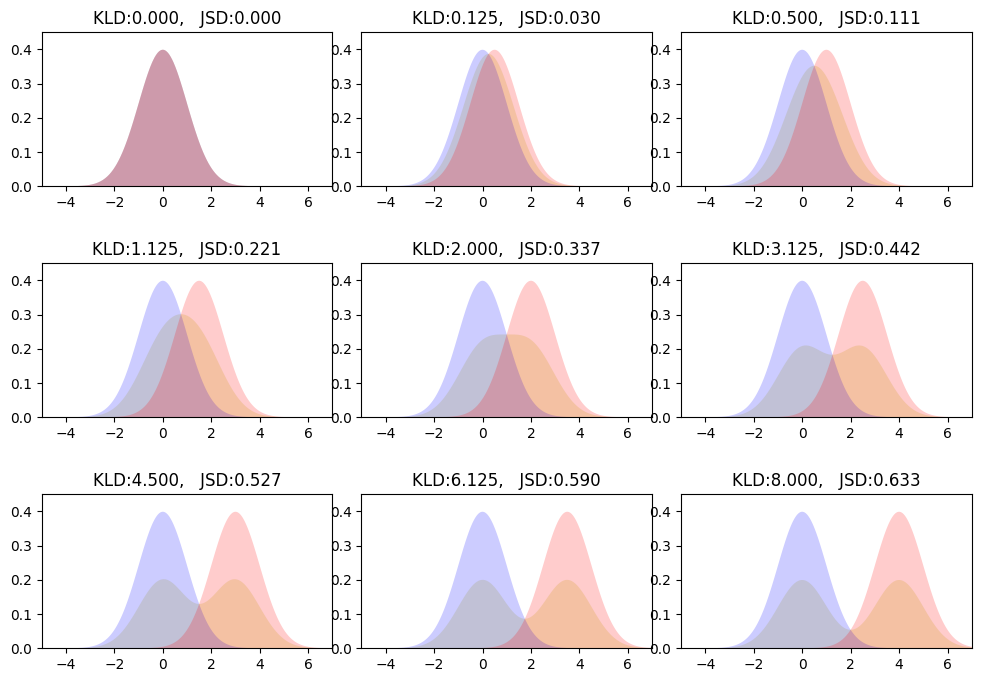

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, entropy
x = np.linspace(-10.0, 10.0, 10000)
plt.figure(figsize=(12,8))
for i in np.arange(3):
    for j in np.arange(3):
        index = i*3 + j
        p = norm.pdf(x, loc=0, scale=1)
        q = norm.pdf(x, loc=index*0.5, scale=1)
        m = (p+q)/2
        # KL divergenceとJS divergenceの計算
        kl = entropy(p, q)
        kl_pm = entropy(p, m)
        kl_qm = entropy(q, m)
        js = (kl_pm + kl_qm)/2
        # plot
        plt.subplot(3,3,i*3+j+1)
        plt.fill_between(x, m, facecolor="y", alpha=0.2)
        plt.fill_between(x, p, facecolor="b", alpha=0.2)
        plt.fill_between(x, q, facecolor="r", alpha=0.2)
        plt.xlim(-5, 7)
        plt.ylim(0,0.45)
        plt.title("KLD:{:>.3f}".format(kl) + ",   JSD:{:>.3f}".format(js))
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

### Wasserstein Loss

#### Wasserstein Distance

Wasserstein distanceはJS divergenceと同様2つの確率密度関数の距離をはかる指標で、Earth Mover's distanceとも呼ばれ、EM distanceと略されることもある
  - 実際に土を運ぶ例えで説明されている

Wasserstein distanceは、ある確率密度関数を動かしてもう一つの確率密度関数に一致させるときの最小コストを意味する

2つの確率密度関数$p_r$と$p_g$のWasserstein distanceは次のように与えられる

$$ W(p _ r, p _ g) = \inf _ {\gamma \sim \Pi(p _ r, p _ g)} \mathbb{E} _ {(x,y) \sim \gamma} \left[ ||x - y || \right] $$

$\inf$は下限でありwasserstein distanceを求めることそのものが最適化問題となる

$\gamma(x,y)$は$p_r$のある地点$x$から$p_g$のある地点$y$に動かす確率密度の単位幅に相当する面積とする
- 正確には地点$x$から全面積$\int p_r(x)dx$のうちどの面積を地点$y$へ移動するかを表す
- 移動によりp_rをp_gに一致させることから、$\sum_x\gamma(x,y)=p_g(y)$であり、逆に、$\sum_y\gamma(x,y)=p_r(x)$も成り立つ

この面積に移動距離$||x-y||$を掛けることでコストを求めることができる

候補となる動かし方戦略\gammaのうち総コストが最小となる場合を求めることでWasserstein Distanceを得ることができる


#### Wasserstein Distanceの実際

Wasserstein DistanceはKantorovich-Rubinstein双対性を使って、

$$ W(p _ r, p _ g) = \frac{1}{K} \sup _ {||f|| _ {L} \leq K} \mathbb{E} _ {x \sim p _ {r}} [f(x)] - \mathbb{E} _ {x \sim p _ {g}} [f(x)] $$

と変換することができる

この場合のDiscriminatorは良い$f$を求めることを目的とするが、そのためにWGANは損失として$p_r$(現実のデータの分布)と$p_g$(Generatorが生むデータの分布)間のWasserstein distanceを利用する
- つまり、学習が進むにつれてGeneratorは現実のデータの分布に近いデータの分布を出力できるようになる

$$ L(p _ {r}, p _ {g}) = W(p _ {r}, p _ {g}) = \max _ {w \in W} \mathbb{E} _ {x \sim p _ {r}} [f(x)] - \mathbb{E} _ {z \sim p _ {z}} [f(g _ {\theta}(z))] $$

ただ、もう一つ勘案しなければならないことがある

#### Lipschitz 連続性

Wasserstein distanceの$f$には$||f||_L \le K$という制約がある
- この制約をK-リプシッツ連続という

関数$f:ℝ → ℝ$は次の条件を満たす時にK-リプシッツ連続となる

「ある定数$K≥0$が存在し、全ての$x1,x2∈R$に対して$ |f(x _ {1} - f(x _ {2})| \leq K |x _ {1} - x _ {2}| $となる
- つまり任意の区間の傾きがある値K(リプシッツ定数)より小さいことを意味する

任意の場所で微分可能な関数はリプシッツ連続であるが、逆は成り立たない(例えば、f(x)=|x|は原点で微分不可能)

$ L(p _ {r}, p _ {g}) $の式における$f$はK-リプシッツ性を維持しなければならないが、その簡単かつ強力な方法は、重み$w$を更新した後、$w$を$[-0.01, 0.01]$といった小さな範囲でクリップする方法である
- パラメータ空間$W$は小さくなり、$f$の傾きを抑えることができる
- 一方でネットワークが極端に単純化され学習が収束しない場合が想定される

そこで、勾配制約という手法が提案された

$$\lambda 𝔼_{\hat{x}～ℙ_\hat{x}}[(||\nabla_{\hat{x}}D(\hat{x})||_2-1)^2]  $$

$\nabla$は勾配演算子、$\lambda$はPnelty coefficientで10といったの値

そこで、もともとのcricic Lossに、勾配制約を加えて全体のロスとする

### 気になること#1(割合で計算したらどうしてだめ？)

もっともな疑問として、例えば$a_1, a_2, a_3$があった場合、確率でよいのだから、$a_1/\sum_a, a_2/\sum_a, a_3/\sum_a$でもよいではないか？と考えるかもしれない
- もちろん、そうであり、実際このような関数は微分の計算も容易で利用できなくはない
- ただし、実際には収束速度が遅い
  - 正規化すれば分母は1であるから、結局$y=x$的な評価であり、微分値がつねに等しく1となることから、外れているからと言って急速に近づこうとはしない
  - 交差エントロピーなどに含まれる$-log(x)$の演算は、xが小さい場合急激に値が大きくなるとともに、$0<x<1$であるため確率を扱う上で都合がよい
    - 例えば確率1では値が0になり、確率が0に近づくと急激に値が大きくなる
  - さらに微分を考えても、$1/x$であり、確率として$0<y<1$の値の範囲で考えても、誤差が大きいとき、つまり0に近づくにつれて値が急激に大きくなることから損失関数として適している
- したがって、学習速度や扱いやすさを考慮すると普通は使わない

NNの発展は、様々な要素があるが、計算性能の向上に加え、数理学的な計算量削減と意味付けによるところも多いことがわかる

### 気になること#2(交差エントロピーかKLダイバージェンスか、それとも)

- 交差エントロピーは予測の難しさそのもの表現している
- KLダイバージェンスは、 P(x)からQ(x)の**相対的**な予測の難しさ、どれだけ似ているかを表現している
- JSダイバージェンスは、P(x)とQ(x)の双方からみた予測の難しさを対称性を保って表現している
- GANでは、KLやJSを利用することがあったが、Wasserstein distanceの登場により、WDを利用することが一般的になりつつある

ほぼ単純に、計算速度を向上するという目的で、交差エントロピーが利用されている
- 距離の概念を持ち込む場合には、対称性があり距離としても定義できるJSダイバージェンスを用いる
  - ユークリッド距離のように確率分布間の距離が求められるため
  - 情報幾何学の領域


### 気になること#3(結局何を使えばよいの？)

必ずそうでなければいけない、ということもないが、一般的に次のような方針となる





#### バイナリ分類：2つの排他的なクラスの分類

バイナリクロスエントロピーかクロスエントロピーを利用する

##### **クロスエントロピーを利用する場合**

普通にone-hotで表現して、クロスエントロピーロスを計算して最適化すればよい

##### **バイナリクロスエントロピーを利用する場合**

２クラス分類の場合、片方のクラスに対する確率が分かれば、もう一方の確率も1から引けば求まる。従って、出力層のユニット数を1として、0がクラス1、1がクラス2とすれば分類できる
- この場合、出力$y$と$1−y$がそれぞれクラス1,2に属する確率を表す場合、交差エントロピーの式を変形すると次のバイナリクロスエントロピー(2値交差エントロピー)を得ることができる
- softmaxの出力は確率のように足して1になるため、出力$y$と$1−y$とすると、
$$
loss(o,t)=−\frac{1}{n}\sum_i{t_ilog(o_i)+(1−t_i)log(1−o_i)}
$$
となる
- PyTorchではバイナリクロスエントロピーはBCELoss関数で求めることができる

クロスエントロピーは、真であるという予測が正しく真である時のみに限定して損失を求めるが、バイナリクソルエントロピーは、真であろうという予測が真でありかつ、偽であるという予測が正しく偽であることも勘案する

- なお、明確な違いはその点だけであるため、バイナリクロスエントロピーロスを多値分類に用いることはできなくはない、が普通はやはり収束速度の観点からやらない

- さらにsigmoidを用いて[0, 1]の値をとるようにしたあと2値交差エントロピーを利用することもしばしば行われる

- これを一度に行うのがBCEWithLogitsLossであり、PyTorchではBCEWithLogitsLoss関数で求めることができる

$$
loss (o, t) = -\frac{1}{n} \sum_i \left\{t_i \log(sigmoid(o_i)) + (1-t_i) \log(1- sigmoid(o_i))\right\}
$$

つまり、PyTorchのBCELossとBCEWithLogitsLossは、入力定義が異なる
- BCELossはシグモイドをとった後の値を入力とする
- BCEWithLogitsLossはシグモイドをとる前の値を入力とする
- BCEWithLogitsLossはシグモイド層とBCELossを1つのクラスにまとめたもので、単純なSigmoidとBCELossの組み合わせよりも数値的に安定するように工夫されている

#### マルチクラス分類：3つ以上の排他的なクラス
3つ以上のクラスの**どこか一つだけ**に分類される

カテゴリカルクロスエントロピーを使用する(PyTorchではCrossEntropyLoss)

PyTorchには純粋なカテゴリカルクロスエントロピーロス関数は定義されておらず、その上位互換が存在する(CrossEntropyLoss)
- 実は使いやすいように、安定するように工夫されているのだが、この工夫が逆に学ぶ上で疑問を生んでいる
- 次のように記述すると等価になりますが、この方法を用いてはいけません(普通にCrossEntropyLoss関数を使うこと！)
```
nn.NLLLoss()(torch.log(y_pred), y_true)
```
- これらについては、PyTorchに入ってから別途コードを用いて説明します
- PyTorchでは収束しやすいように裏で様々な手法が用いられており、これらは基本的に記述する必要がないが、これらの手法を利用するためには、利用側が意識して複合機能関数を利用する必要がある



#### マルチラベル分類：非排他的なクラスのみ

3つ以上のクラスの**複数**に分類されてもよい

この場合は、バイナリクロスエントロピーを使用する
- つまりそれぞれのラベルについて0か1かを選択する、という問題として捉える
- ベルヌーイ分布を多次元にしたカテゴリカル分布に基づくカテゴリカルクルスエントロピーを用いると、どれか1つを選択するため、明らかに精度が低下、そもそも利用できない
- MSEなどでも問題はない

ちなみに
- 事象の想起を扱う分布がベルヌーイ分布(コイントス)  
$Bern(x|\mu)=\mu^x(1-\mu)^{1-x}$
- ベルヌーイ分布を多試行化すると二項分布(何回も投げるコイントス)  
$Bin(m|\mu,N)=\frac{N!}{m!(N-m)!}\mu^m(1-\mu)^{N-m}$
- ベルヌーイ分布を多次元化するとカテゴリカル分布(サイコロ)  
$Cat({\mathbf x}|{\mathbf \mu})=\prod^K_{k=1}\mu^{x_k}_k$
- 二項分布を多次元化する、カテゴリカル分布を多試行化すると多項分布(何度もサイコロ)  
$Mult({\mathbf m}|{\mathbf \mu}, N)=\frac{N!}{m_1!\cdots m_K!}\prod^K_{k=1}\mu^{m_k}_k$
- ベータ分布はベルヌーイ分布と二項分布についての共役事前分布  
$Beta(\mu|a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$
- ディレクレ分布はカテゴリカル分布と多項分布についての共役事前分布である  
$Dir({\mathbf \mu$|{\mathbf \alpha}}=\frac{\Gamma(\sum^K_{k=1}\alpha_k)}{\Gamma(\alpha_1)\cdots \Gamma(\alpha_K)}\prod^K_{k=1}\mu^{\alpha_k-1}_k$

出力層の活性化関数にsofmaxを用いると、合計が1になるため、ある特定のラベルを際立たせることしかできなくなる
- そこで、出力の和が1という制限を外し、一般にsigmoidを用いる(tanhなどもありえる)

マルチクラスにおいて、正解を1、残り全て0とするone-hotは、正解すべてを1とする(multi-hot?)ならばマルチラベルでも利用できる。さらに言えば、ある複数のラベルに属する場合、これを新たな1つのラベルとして定義すれば、one-hotのままでよい
- つまり、マルチクラス分類とすることもできなくはない
- ただしラベルが膨大に増える結果、ネットワークも複雑になりやすく、学習不足に陥りやすい

## ニューラルネットワークの最適化

NNの目的関数が望ましい値をとるようにNNの主に${\bf W}$や${\bf b}$などのパラメータを決定することを、NNの最適化と呼ぶ

- 既に述べたように、NNの各パラメータを、目的関数に対する勾配を0とおいて解析的に解くことは一般的には困難
- しかしながら、教師データをNNに入力すれば、その入力値における目的関数の勾配を数値的また、逐次的に求めることは可能
- 学習するとも表現し、深層NNでは「カーネル関数をデータに合わせて学習する方法」とも言える
  - 各層でデータから適応的にカーネル関数を獲得する点で、通常のカーネル法と異なる


### 初等的な例題的な勾配降下法の説明

目的関数は多次元で複雑な形を有するが、パラメータ $w$ と目的関数 $\mathcal{L}$ の値はシンプルな二次関数の形をもつとして、この目的関数が最小値を与えるような $w$ の決定を考える

- NNのパラメータはまず乱数で初期化され、$w=3$ と初期化されたとする

- 次に、$\mathcal{L}$の勾配 $\frac{\partial \mathcal{L}}{\partial w}$ は、目的関数が全パラメータについて微分可能であると定義されており、 $\mathcal{L}(w)$ という関数の接線の傾き(勾配; gradient)を必ず求めることができる
  - $w=3$のとき微分値が$3$ になったとする

<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-11.png" width=300>

> 厳密には損失関数に微分不可能な点が存在する可能性があり、ReLUにおいても$x=0$ において微分不可能である

>しかしながら、このような値に落ちることは稀で、簡単な例外処理で対応できるため無視してよい

- 次に、$w$ の値が正であるため、$\mathcal{L}$ の値を小さくするために傾きの逆方向へ $w$ を変化させる必要がある
  - さらに、勾配が大きいほど大きく変化させるため、$w$ **から** $\partial \mathcal{L} / \partial w$ **を引く**という方針が見える
  - 実際には、$w$ の更新量のスケール(ステップサイズ)を調整するため、勾配に **学習率 (learning rate)** と呼ばれる値を乗じる

> 例えば、学習率を $0.5$ とすると、$w$の更新量は **学習率** $\times$ **勾配** となり、$0.5 \times 3 = 1.5$ と求まる

> $w=3$ からこの値を引いて$w \leftarrow w - 1.5$ と更新すると、$w=1.5$ となる

- これらの処理を繰り返すことで$\mathcal{L}$が最小値をとるときの$w$の値に近づく
  - このような勾配を用いた目的関数の最小化手法を **勾配降下法** と呼ぶ



### ミニバッチ学習

ニューラルネットワークを勾配降下法で最適化する場合、計算量削減のため、データを一つ一つ用いてパラメータを更新することは行わず、いくつかのデータをまとめて入力し、それぞれの勾配を計算したあとに、その勾配の平均値を用いてパラメータの更新を行う
- これを **ミニバッチ学習** と呼ぶ

- ミニバッチ学習では、学習データセットから$k (>0)$ 個のデータを抽出し、その $k$ 個のデータに対する目的関数の平均の値を小さくするようにパラメータを更新するという作業を繰り返す
  - 他の異なる $k$ 個のデータの組み合わせに対しても繰り返す
  - 結果的にはデータセットに含まれる全てのデータを使用する

実際には、次の処理を行う

- データセット内のサンプルのインデックスをランダムにシャッフルして並べた配列を作成する
- その配列の先頭から $k$ 個ずつインデックスを取り出し、ミニバッチを構成する
- 全てのインデックスを使い切るまでの一連の処理を **1エポックの学習** と呼ぶ

$k$ をバッチサイズもしくはミニバッチサイズと呼び、このような学習方法を**確率的勾配降下法 (SGD: Stocastic Gradient Descent)** と呼ぶ

現在、ほとんどのニューラルネットワークにおける最適化手法はSGDを基本としている
- SGDを用いることで、計算時間が劇的に少なくできるだけでなく、図のように目的関数が凸関数でなかった場合であっても、適当な条件のもとで**ほぼ確実に**局所最適解に収束することが知られている

<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-14.png" width=300>

さらに、モデルの過学習を防ぐために、正則化を行う場合もある

- 例えばL1正則化ではパラメータ$w_i$が学習が進むにつれ0になりやすくなるようにする
  - 結果的に層の間のリンクが失われる
  - すると、ノードの利用量を制限する方向に進む
  - このことから、**次元圧縮**という表現が用いられる

- この次元圧縮という考え方は、DNNにおける重要な機能であり、正則化によらず、敢えて中間ノード数を減らすというテクニックとしても用いられる

複雑なDNNは、収束しにくいと考えるかもしれない
- もちろん、そうではあるが、実際は計算さえできれば、かなり規模が大きくても収束してしまうようになってしまった
- つまり、かなり無茶しても結構収束してしまう、そういう手法ができてしまったと考えた方が良い

L2正則化は、モデルの過学習を防ぐための手法の一つとして利用されている
- 過学習の防止策として他にも敢えて一部のノードの計算を省いて($w$を0として)計算するdropoutなどが存在する
- 繰り返すが、そういう無茶をしても収束できるようになってしまったと考えた方が良い

もし、研究でDNNを利用するのであれば、「あえて収束しない方向に動く」方が楽に新発見ができるかもしれない
- GANでさえ収束するのである

### パラメータ更新量の算出

下図のような3層の全結合型ニューラルネットワークについて、1層目と2層目の間の線形変換を ${\bf w}_1, {\bf b}_1$、2層目と3層目の間の線形変換を ${\bf w}_2, {\bf b}_2$ というパラメータで表現する
- これらをまとめて $\boldsymbol{\Theta}$ とする
- 図ではバイアス ${\bf b}_1, {\bf b}_2$ は省略している


<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-08.png" width=300>

入力ベクトルを ${\bf x}$、出力ベクトルを ${\bf y} \in \mathbb{R}^N$（$N$ 次元実数ベクトル）とし、入力 ${\bf x}$ に対応した「望ましい出力」である教師ベクトルを ${\bf t}$ とする

また、目的関数として前述の平均二乗誤差関数を用いる

以下に、パラメータを乱数で初期化したあと、入力 ${\bf x}$ が与えられたときの目的関数の各パラメータの勾配を計算し、各パラメータの更新量を算出する具体的方法を示す

- 目的関数を改めてベクトル表記を用いて書き下すと次の通りとなる
$$
\mathcal{L}({\bf y}, {\bf t}) = \frac{1}{N} || {\bf t} - {\bf y} ||_2^2
$$

  - ここで、$|| {\bf t} - {\bf y} ||_2^2$はユークリッドノルムの2乗を意味し、結果的に$({\bf t} - {\bf y})^T({\bf t} - {\bf y})$と同等となる
  
- さらに，ニューラルネットワーク全体を $f$ とすると、出力 ${\bf y}$ は
$$
\begin{aligned}
{\bf y} &= f({\bf x}; \boldsymbol{\Theta}) \\
&= a_2 ( {\bf w}_2 a_1({\bf w}_1 {\bf x} + {\bf b}_1) + {\bf b}_2 )
\end{aligned}
$$
と書くことができる

  - ここで、1層目と2層目の，および2層目と3層目の間で線形変換のあとに施される非線形変換（活性化関数）をそれぞれ、$a_1、 a_2$としている
  
  - 以下、簡単化のため、各層間で行われた線形変換の結果を ${\bf u}_1および {\bf u}_2$とし，中間層の値、すなわち ${\bf u}_1$ に活性化関数を適用した結果を ${\bf h}_1$ とする
  - ただし、${\bf u}_2$ に活性化関数を適用した結果は ${\bf y}$ と表記する

- これらの関係は以下のように整理できる。

$$
\begin{aligned}
{\bf y} &= a_2({\bf u}_2) \\
{\bf u}_2 &= {\bf w}_2 {\bf h}_1 + {\bf b}_2 \\
{\bf h}_1 &= a_1({\bf u}_1) \\
{\bf u}_1 &= {\bf w}_1 {\bf x} + {\bf b}_1
\end{aligned}
$$

#### パラメータ ${\bf w}_2$ の更新量

- 最初に、出力層に近い方のパラメータである${\bf w}_2$ について、$\mathcal{L}$ の勾配を求める
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial {\bf w}_2}
&= \frac{\partial \mathcal{L}}{\partial {\bf y}} \frac{\partial {\bf y}}{\partial {\bf w}_2} \\
&= \frac{\partial \mathcal{L}}{\partial {\bf y}} \frac{\partial {\bf y}}{\partial {\bf u}_2} \frac{\partial {\bf u}_2}{\partial {\bf w}_2}
\end{aligned}
$$

- この3つの偏微分はそれぞれ次の通りとなる
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial {\bf y}}
&= -\frac{2}{N} ({\bf t} - {\bf y}) \\
\frac{\partial {\bf y}}{\partial {\bf u}_2}
&= \frac{\partial a_2}{\partial {\bf u}_2} \\
\frac{\partial {\bf u}_2}{\partial {\bf w}_2}
&= {\bf h}_1
\end{aligned}
$$

- ここで、活性化関数の入力に関する出力の勾配は次を求めることで得られる
$$
\frac{\partial a_2}{\partial {\bf u}_2}
$$

- これは、例えば活性化関数にシグモイド関数を用いる場合では
$$
a_2({\bf u}_2) = \frac{1}{1 + \exp(-{\bf u}_2)}
$$
の微分となる

- 実際に計算すると、
$$
\begin{aligned}
\frac{\partial a_2({\bf u}_2)}{\partial {\bf u}_2}
&= -\frac{-(\exp(-{\bf u}_2))}{(1 + \exp(-{\bf u}_2))^2} \\
&= \frac{1}{1 + \exp(-{\bf u}_2)} \cdot \frac{\exp(-{\bf u}_2)}{1 + \exp(-{\bf u}_2)} \\
&= \frac{1}{1 + \exp(-{\bf u}_2)} \cdot \frac{1 + \exp(-{\bf u}_2) - 1}{1 + \exp(-{\bf u}_2)} \\
&= \frac{1}{1 + \exp(-{\bf u}_2)} (1 - \frac{1}{1 + \exp(-{\bf u}_2)}) \\
&= a_2({\bf u}_2)(1 - a_2({\bf u}_2))
\end{aligned}
$$
となる

つまり、シグモイド関数の勾配は、シグモイド関数の出力値を使って容易に求まることがわかる
- また、そのような関数が選ばれていることがわかる

以上により、 ${\bf w}_2$ の勾配を計算するのに必要な値は全て求まったことになる

### NumPyによる演算

より具体的な理解を進めるため、実際にNumPyを使ってこれらを計算する
- ここでは簡単化のため、乱数は用いず、バイアスベクトルはすべて0で初期化されているとする
- 実際には重みとバイアスの初期化は乱数が基本である
  - 例えば0など同じ値で初期化すると、全ノードの損失関数の偏微分($\frac{\partial L}{\partial w}$)が同じ値になり、最急降下法による修正量も同じになる
  - ノードにかかわらず重みやバイアスが同じ値になり、かつ、同じ重みやバイアスを持つノードは同じ値を伝番させ同じ勾配を得る
    - つまり同じ挙動を示すため、結果的に該当する層の次元数が見かけ上小さくなる
  - すなわち、そのニューラルネットワークが持つ表現力が低下したことを意味する
  - 多くの場合、学習がうまくいかないという現象が発生する

さて、NumPyでの具体的演算は次の手順となる
- NumPyモジュールを読み込む
- 入力の配列を定義する
 - ここでは、図と同じとなるよう3次元ベクトル$(2, 3, 1)$を定義する
 - 正解として20 を与える

In [2]:
import numpy as np
# 入力
x = np.array([2, 3, 1])
# 正解(教師データ)
t = np.array([20])
x, t

(array([2, 3, 1]), array([20]))

次に、パラメータを定義する\
ここでは、以下の4つのパラメータを定義する

- **1層目と2層目の間の線形変換のパラメータ**
 - ${\bf w}_1 \in \mathbb{R}^{2 \times 3}$ : 3次元ベクトルを2次元ベクトルに変換する行列
 - ${\bf b}_1 \in \mathbb{R}^2$ : 2次元バイアスベクトル
- **2層目と3層目の間の線形変換のパラメータ**
 - ${\bf w}_2 \in \mathbb{R}^{1 \times 2}$ : 2次元ベクトルを1次元ベクトルに変換する行列
 - ${\bf b}_2 \in \mathbb{R}^1$ : 1次元バイアスベクトル

In [3]:
# 1-2層間のパラメータ
w1 = np.array([[3, 1, 2], [-2, -3, -1]])
b1 = np.array([0, 0])
# 2-3層間のパラメータ
w2 = np.array([[3, 2]])
b2 = np.array([0])
w1, b1, w2, b2

(array([[ 3,  1,  2],
        [-2, -3, -1]]),
 array([0, 0]),
 array([[3, 2]]),
 array([0]))

実際の各層の計算は次の通りとなる

In [4]:
# 中間層の計算
u1 = w1@x + b1
h1 = 1. / (1 + np.exp(-u1))
# 出力の計算
u2 = w2@h1 + b2
y = 1. / (1 + np.exp(-u2))
y

array([0.95257194])

答えは $0.95257194$ と求まる

つまり、$f([2, 3, 1]^T) = 0.95257194$ となることがわかる

次に上で求めた

$$
\frac{\partial \mathcal{L}}{\partial {\bf w}_2}
= \frac{\partial \mathcal{L}}{\partial {\bf y}} \frac{\partial {\bf y}}{\partial {\bf u}_2} \frac{\partial {\bf u}_2}{\partial {\bf w}_2}
$$

の右辺の3つの偏微分をそれぞれ計算する

In [5]:
# dL / dy
g_Ly = -2 / 1 * (t - y)
# dy / du_2
g_yu2 = y * (1 - y)
# du_2 / dw_2
g_u2w2 = h1

これらを掛け合わせると求めるパラメータ ${\bf w}_2$ の勾配が得られる

In [6]:
# dL / dw_2: 求めたい勾配
g_Lw2 = g_Ly * g_yu2 * g_u2w2
g_Lw2

array([-1.72104507e+00, -1.43112111e-06])

ここで得られる配列としてのベクトルが $\partial \mathcal{L} / \partial {\bf w}_2$ の値である

- これを学習率でスケールさせれば、パラメータ ${\bf w}_2$ を更新するこ値として利用できる

更新式は、後述のSGDを用いて学習率を $\eta$ とすると以下のようになる

$$
{\bf w}_2 \leftarrow {\bf w}_2 - \eta \frac{\partial \mathcal{L}}{\partial {\bf w}_2}
$$

#### 学習率（learning rate）について

どのように漸近するかの程度を決める
- 学習率の値が大きすぎる場合、パラメータ更新の度、目的関数の値が振動したり，発散したりする
- また、小さすぎると収束に時間がかかる
  - そこで、学習率を適切に決定することがニューラルネットワークの学習においては重要
  
多くの場合、学習がきちんと進むもっとも大きな値を経験的に探すことになるが、シンプルな画像認識といったタスクであれば、大抵は最初に0.1~0.01といった値が用いられる場合が多い
- また、後述するが様々な最適化手法が提案されている

#### パラメータ ${\bf w}_1$ の更新量

次に，${\bf w}_1$ の更新量を求める

これには、${\bf w}_1$ で目的関数 $\mathcal{L}$ を偏微分した値が必要となるが、以下のように計算できる

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial {\bf w}_1}
&= \frac{\partial \mathcal{L}}{\partial {\bf y}} \frac{\partial {\bf y}}{\partial {\bf w}_1} \\
&=
\frac{\partial \mathcal{L}}{\partial {\bf y}}
\frac{\partial {\bf y}}{\partial {\bf u}_2}
\frac{\partial {\bf u}_2}{\partial {\bf w}_1} \\
&=
\frac{\partial \mathcal{L}}{\partial {\bf y}}
\frac{\partial {\bf y}}{\partial {\bf u}_2}
\frac{\partial {\bf u}_2}{\partial {\bf h}_1}
\frac{\partial {\bf h}_1}{\partial {\bf w}_1} \\
&=
\frac{\partial \mathcal{L}}{\partial {\bf y}}
\frac{\partial {\bf y}}{\partial {\bf u}_2}
\frac{\partial {\bf u}_2}{\partial {\bf h}_1}
\frac{\partial {\bf h}_1}{\partial {\bf u}_1}
\frac{\partial {\bf u}_1}{\partial {\bf w}_1}
\end{aligned}
$$

これら5つの偏微分のうち、初めの1つはすでに求めた

残りの4つもそれぞれ、

$$
\begin{aligned}
\frac{\partial {\bf y}}{\partial {\bf u}_2}
&= {\bf y}(1 - {\bf y}) \\
\frac{\partial {\bf u}_2}{\partial {\bf h}_1}
&= {\bf w}_2 \\
\frac{\partial {\bf h}_1}{\partial {\bf u}_1}
&= {\bf h}_1(1 - {\bf h}_1) \\
\frac{\partial {\bf u}_1}{\partial {\bf w}_1}
&= {\bf x}
\end{aligned}
$$

と計算できる

NumPyを用いて実際に計算すると次のようになる

In [7]:
g_yu2 = y * (1 - y)
g_u2h1 = w2
g_h1u1 = h1 * (1 - h1)
g_u1w1 = x
# 上から du1 / dw1 の直前までを一旦計算
g_Lu1 = g_Ly * g_yu2 * g_u2h1 * g_h1u1
# g_u1w1は (3,) というshapeなので，g_u1w1[None]として(1, 3)に変形
g_u1w1 = g_u1w1[None]
# dL / dw_1: 求めたい勾配
g_Lw1 = g_Lu1.T@g_u1w1
g_Lw1

array([[-1.72463398e-04, -2.58695098e-04, -8.62316992e-05],
       [-5.72447970e-06, -8.58671954e-06, -2.86223985e-06]])

これが $\partial \mathcal{L} / \partial {\bf w}_1$ の値である

この値を用いて、${\bf w}_2$ と同様に以下の式でパラメータ ${\bf w}_1$ を更新できる

$$
{\bf w}_1 \leftarrow {\bf w}_1 - \eta \frac{\partial \mathcal{L}}{\partial {\bf w}_1}
$$

## 最適化アルゴリズム

ニューラルネットワークなど全ての機械学習の到達目標は**損失をゼロにする**ことであり、効率よく損失をゼロにするのが最適化アルゴリズムである

- 何も見えない状態の山で谷底を目指すにはどうすればよいか？例えば、標高を誤差とすると、低いところを目指せばよいことになる

まず、このような地図を書くためにはすべての点の高度を計算することになるが、2次元であればできなくもない(それでも大変であるが)
- 実際には数万以上の次元があるためこのような地図を書くことは非現実的である

<img src="http://class.west.sd.keio.ac.jp/dataai/text/approach.png" width=300>

ある場所にランダムに配置され、そこから最適な場所を目指すとき、次のような方針が考えられる

- 足元の傾きを見て、より低い方法をみる
- 今まで辿ってきた経緯を見て、進むべき方向を決める

次の図のように、様々な最適化方針があるが、最急降下法を基本としているものが殆どである
- 別のテキストで、PyTorchで利用可能な最適化関数についてコードを用いて説明する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/ruder.io_content_images_2016_09_saddle_point_evaluation_optimizers.webp" width=300>

(Alec Radford Twitter)

### SGD(確率的勾配降下法)
$$
{\bf w} \leftarrow {\bf w} - \eta \frac{\partial \mathcal{L}}{\partial {\bf w}}
$$
とする
- なお、$\mathcal{L}は、\mathcal{E}やE$とも表記される

全てのデータについて勾配を計算せず、訓練データよりランダムにサンプルを取り出して勾配を求めて計算コストを抑えることを**確率的**と呼び、この点が最急降下法とSGDの唯一の違いである
- ローカルミニマム、つまり最小値ではなく、部分的な極小値に陥ったとしても、ランダムに選んだ結果、大きく外れてそこから抜け出すことができる可能性があることを意味する
  - 本質的にそのような状況が存在するかどうかは、様々な議論がある
  - 乱択により平均的な移動が行われ、過学習になりにくくするという観点でも有効である

- AdaGrad (エイダグラッド、アダグラード)

学習が進むにつれてパラメータの更新量${\bf h}$を低減させる手法である
 $$
{\bf h} \leftarrow {\bf h} + \left( \frac{\partial \mathcal{L}}{\partial {\bf w}} \right)^2
$$
について、${\bf h}$は単調増加し、結果として下記の${\bf w}$は単調に減少する
 $$
{\bf w} \leftarrow {\bf w} - \eta \frac{1}{\sqrt h} \frac{\partial \mathcal{L}}{\partial {\bf w}}
$$

- なお、2乗を利用しているのはいつもの通り、単純に符号を外したいためである

この方法は、更新幅が大きいままであれば収束が遅くなり、更新量が小さくなりすぎると最適解にたどり着かないため、調整が必要で、かつ調整は容易とは言えない

### モーメンタム

- ポテンシャルにおいて深い渓谷を形成するようなケース(Pathological Curvature)に対して追従が遅いという問題があり、これは、勾配が急な面が接近している場合に更新量が大きすぎ振動する結果、漸近速度が低下するため

  <img src="http://class.west.sd.keio.ac.jp/dataai/text/pathologicalcurvature.png" width="50%">

そこで、振動を抑えるために過去の勾配変化を利用することが考えられ、次式の勾配もしくは学習

$$
\begin{aligned}{\bf w_{t+1}}&={\bf w_t}-\lambda \frac{\partial E({\bf w})}{\partial {\bf w}}\\
&={\bf w_t}-\lambda \nabla_{\bf w}\mathcal{L}({\bf w})\end{aligned}
$$
としたときの学習率$\lambda$を調整する手法をRMSProp、ナブラとしての勾配$\nabla_{{\bf w}}$を調整する手法をモーメンタムと呼ぶ

急激に変化するのを抑えたいならば、ローパスフィルタを取ればよく、最もシンプルな考え方は移動平均をとることである

- 移動平均を用いて$\lambda$を決定することを考える

- 移動平均の求め方には様々あるが、ここで用いられる基本的な考え方は、最新の値$\nabla_w\mathcal{L}(w)$に対して、これまでの値$\nu_{t-1}$と$N$の内分をとることである

- ハイパーパラメタ$\beta$を用いれば、
 $$
\nu_t = \beta\nu_{t-1} + (1-\beta)\nabla_w\mathcal{L}(w)
$$
となる

- の$\nu$を使って、
 $$
w_t = w_{t-1} - \alpha \nu_t
$$
 として$w_t$を更新する

#### (参考)ミニバッチ

更新で使うデータ数を1つに限定すると並列性が活用できないため、そのデータ数を増やして並列化させる手法であり、一般的に16個や32個といった小さな塊であるミニバッチを用いてまとめて更新させるという手法が広く利用されており、この方法も同様の効果を得ることができる


### RMSProp

学習率を調整して振動を抑える手法で、振動方向の学習率を下げる、つまり、勾配の大きさに応じて学習率を調整する手法である

式にすると、
$$
\nu_t = \beta\nu_{t-1} + (1-\beta)(\nabla_w\mathcal{L}(w))^2 \\
w_t = w_{t-1} - \frac{\eta}{\sqrt{\nu_t + \epsilon}} \nabla_w\mathcal{L}(w)
$$
となり、$\epsilon$ はゼロ除算を避けるための極めて小さい値であり、それ以外の記号は既出である

- 負の値を避けるためであるが、移動平均の式の$N$が2乗で効いており、さらに、$\nu_t$は$w$の更新式では分母にあるため、$w_{t-1}$の重みが結果的に増えて新しい更新値が反映されにくくなる
- 結果的に、振動を抑えることができる

### Adam (アダム)

一般に用いられる方法で、問題なければAdamを選択するとよい

学習の進行度合いや過去の履歴に基づいて更新量を調整する方法で、モーメンタムとRMSPropの利点を併せた手法である

例えば、次の式
$m_t = \beta_1 m_{t-1} + (1-\beta_1)\frac{\partial \mathcal{L}}{\partial w}$
について、$\beta_1 m_{t-1}$は$t-1$つまり一つ前の情報を表し、$(1-\beta_1)\frac{\partial \mathcal{L}}{\partial w}$は学習の進捗度合いを表しているように、過去の履歴と進捗の両方を利用する

$$
m_0 = v_0 = 0\\
m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla_w\mathcal{L}(w)\\
v_t = \beta_2 v_{t-1} + (1-\beta_2)\left(\nabla_w\mathcal{L}(w)\right)^2\\
\hat{m_t} = \frac{m_t}{1-\beta^t_1}\\
\hat{v_t} = \frac{v_t}{1-\beta^t_2}\\
w_t = w_{t-1} - \eta \frac{\hat{m_t}}{\sqrt v_t + \epsilon}
$$

以上のようにして、${\bf w_{new}} \leftarrow {\bf w_{old}}$の更新式を得るが、結局のところ勾配の移動平均と勾配の2乗の移動平均であり、それぞれモーメンタム及びRMSPropの構成式に他ならない
- 一方でパラメータも多く、$\beta_1, \beta_2, \eta, \epsilon$といった定数を定めなければならない
- これらのパラメータについて、Adamの提案者により妥当な値が提案されている

なお、当然であるがAdmは万能ではない
- adamの場合、特定のバッチに有用な情報がたまたま集中していた場合、その情報は更新計算でかき消されてしまう、つまり、良いデータはとっておきたい、ということができない

そこで、さらに改良版のAMSGradが提案されており、PyTorchなどもサポートしている
- これは、$\hat{v_t} = max(\hat{v}_{t-1}, v_t)$とすることで、良い値を残すという工夫がされている


### なぜニュートン法を使わないのか

このような漸近しつつ最適な値や解を求める方法として、ニュートン法が良く知られている
 $${\bf w}_{t+1}={\bf w}_t+\frac{\nabla_{\bf w}\mathcal{L}({\bf w})}{\nabla_{\bf w}^2\mathcal{L}({\bf w})}$$
 ニュートン法が利用できれば、漸近速度は各段にアップし、2階微分まで考慮するためより正確に判定かつ収束できる

一方で、ニュートン法には、ナブラの演算において、正定値でないとき、つまり、$n$個の実数を成分に持つ零ベクトルでないベクトル$z$について、二次形式$z^TMz$が必ず正であるといえないとき、近似された2次多項式は凸関数でなくなる

この時、求めた停留点が鞍点や極大点になるという欠点があり、局所的に値が増加する方向を探索する可能性がある
- このような動作は勾配法の趣旨に反するため、特別なケアが必要となる

もう一つ、$\nabla^2f(x_k)$の計算コストと1次連立方程式$\nabla^2f(x_k)=\nabla f(x_k)$を解を計算コストの両方が必要となるため、計算コストが高いという課題もある
- 変数$x$の次数に対して計算すべき要素の数が$(n2+n)/2$つまり、$O(n^2)$の計算コストが伴う
- パラメータ数が増えるとその2乗で処理が重くなる

このような致命的欠点のため現時点で用いられることはなく、現在も研究対象となっている
- 準ニュートン法が利用される場合がある

## 誤差逆伝播法（バックプロパゲーション）

各パラメータの目的関数の導関数から、実際に勾配を求めてパラメータ更新を行う方法について説明した
- より層数の多いニューラルネットワークの場合、同様の手順で導関数を求めることも可能であるが、ニューラルネットワークが微分可能な関数を繰り返し適用するものであるという性質を用いれば、プログラムにより自動的に勾配を与える関数を導き出すことも可能である

下図は，(1) 3層の全結合型ニューラルネットワークの出力を得るための計算と、(2) 青い矢印でその値を使って目的関数の値を計算する過程を、さらに(3) 赤い矢印で各パラメータにおける目的関数の偏微分を計算する過程、以上の手順を表現している

次のアニメーションはこの様子を的確に表しており、順伝播および逆伝播の様子が視覚的に示されている

<img src="http://class.west.sd.keio.ac.jp/dataai/text/backpropagation.gif" width=600>

目的関数の出力を $l = \mathcal{L}({\bf y}, {\bf t})$ 、丸ノードは変数、四角ノードは関数を表すとする

ニューラルネットワーク全体を一つの巨大な合成関数 $f$ として表し、その中で各層間における線形変換の関数をそれぞれ $f_1$、$f_2$、非線形変換をそれぞれ $a_1$、 $a_2$ とすると、このような合成系での更新量の算出に**誤差逆伝搬**を用いる

図の青矢印のように、新しい入力 ${\bf x}$ が$f$により値 $l$を与えることを **順伝播（forward propagation）** と呼ぶ

- ここで、各パラメータの更新量を求める際に必要となる目的関数の勾配は、各パラメータの丸ノードより先の出力側にある関数の勾配だけで計算できる

- 具体的には上図の赤矢印のように、出力側から入力側に向かって**順伝播とは逆向きに**各関数における入力の勾配を求めて掛け合わせれば、各パラメータの目的関数の勾配が計算できる

このように、ニューラルネットワークを構成する関数が持つパラメータの目的関数の勾配について、合成関数の微分で利用する連鎖律を用いて、**順伝播で通った経路を逆向きにたどるように**途中の関数の勾配の掛け算により求める方法を **誤差逆伝播法（backpropagation）** と呼ぶ

- 誤差逆伝播に関する数式による説明は煩雑であるため、
[別途資料](http://class.west.sd.keio.ac.jp/dataai/data-AI-backpropagation.pdf)を提供するが、特に読むものでも覚えるものでもない

- ここで理解してもらいたいのは、先人たちが、**如何に計算を楽にしつつ、過去存在した問題を解決するか**に挑戦し、解決する手法を構築してくれたということ、その手法を手に入れたので**大量にノードを繋げることができ、かつ最適化をきちんとできるようになった**ということ、そして大量につながった状態を人間が追いかけることに意味はなく、**その基本的な原理を正しく理解していれば利用できる**ということである

  - プロセッサの動作原理は理解していても、数億トランジスタの配置や配線を一人でやるのはまず無理だ、というのと同じである

## 勾配消失

活性化関数について、シグモイド関数は勾配消失という現象が起きやすく、あまり利用されていないと述べた

ガイダンスにおいても実験的に示されているが、この点について概説する

シグモイド関数の導関数は、

$$
\begin{aligned}
f\left( u\right) &=\dfrac {1}{1+e^{-u}} \\
f'\left( u\right) &= f\left( u\right) \left( 1-f\left( u\right) \right)
\end{aligned}
$$

と表現でき、この導関数のグラフは次の通りとなる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/3-09.png" width="50%">

このように、入力が原点から遠くなるにつれ勾配の値が減少し、0に漸近する

- 各パラメータの更新量を求めるためには、**そのパラメータよりも先のすべての関数の勾配を掛け合わせる**必要があるが、活性化関数にシグモイド関数を用いた場合、勾配は**最大でも0.25**となる

- 結果として、層数が増えるほど入力に近い層の勾配が0に近づく

**勾配消失（vanishing gradient）**とは、

- ディープラーニングではより多くの層を積み重ねたNNが用いられるため、活性化関数としてシグモイド関数を使用すると**目的関数の勾配が入力に近い関数が持つパラメータへ全く伝わらず**、パラメータの更新量がほぼ0となる

- 目的関数を大きな値にしても、入力層に近い関数が持つパラメータが更新により変化しなくなる、つまり、学習が行われないという状況に陥る

- このことが深い（十数層を超えるような）ニューラルネットワークの学習が困難であった一つの要因であった



## レイヤとは

ニューラルネットワークを実装する際に利用する各種フレームワークでは、多くの場合その層タイプ(layer type)として様々な関数がまとめられており、この関数に対しても「層」もしくは「レイヤ」という言葉を用いる
- 誤差逆伝播法の図における丸ノード(中間出力などの値)に限らず、四角ノード(関数)についても層(layer)と呼ぶことに注意する
- この慣習は授業ではマイナスになる可能性もあるため、特に区別する際にはノード、もしくはニューロンと呼ぶ

## 様々なレイヤタイプ

ニューラルネットワークには大別して線形変換と非線形変換の二種類の関数が含まれ、特に線形変換の例として **全結合層（fully-connected layer）** について述べた

実際のニューラルネットワークの構成要素として用いるレイヤは、全結合層と活性化関数だけではなく、例えば、画像データの扱いに長けている**畳み込み層(convolution layer)**を線形変換に用いる

- 画像認識や画像生成、画像の変換や超解像(低解像の画像から解像度を高めた画像を作る技術)など、DNNでは画像応用が活発に行われているように、画像との相性がよい

- これは、畳み込み層による恩恵といっても過言ではない

  - レイヤは(一部微分不可能な点があってもよいが基本的に)微分可能な関数であればよい
  - **畳み込みニューラルネットワーク(convolutional neural networks; CNN)** では、畳込み層に加えてプーリング層（pooling layer）と呼ばれるレイヤを用いる

そこで、CNNでよく用いられる**畳み込み層**と**プーリング層**について、その概要を説明する

### 畳み込み層(convolution layer)

全結合層は、出力を求めるためにパラメータ行列${\bf W}$が全次元を備えており、かつその全ての要素（ベクトルであれば全次元の値）を用いる

先に示した通り、順伝播ではノードの結合は、行列の要素の積で表現されており、パラメータ行列${\bf W}$の$i, j$要素である$W_{ij}$と、入力データ${\bf x}$の全要素で結合を表現している、つまり、ある層の全ノードが、次の層の全ノードへの結合を有することを意味す\
これを全結合(fully-connected)と表現する

- 畳み込み層は全結合層とは異なり、パラメータと入力データの間の結合が局所的にしか存在しない

- 例えば、2次元畳み込み層では、パラメータはカーネル(もしくはフィルタ)と呼ばれる小さな画像パッチ(例えば6x6といった画像の一部分)を表す行列の集合とみなし、パッチごとに入力データの一部との間で演算が行われる

次の図を用いて、$3 \times 3$のサイズの小さな画像パッチに関する畳み込みカーネルを2つ持つ畳み込み層の計算過程を考える

<img src="http://class.west.sd.keio.ac.jp/dataai/text/convolution.gif" width="50%">

左の青ブロックは入力画像を表す\
入力は$5 \times 5$ の大きさを持つRGBの3チャネル画像であり、チャネル数分縦に並べている
- これに次に説明するパディング処理により7$\times$7に拡張されている
- $W0$、$W1$それぞれについて以下を計算する(アニメーションは$W1$のみ)
  - 後述するストライドは2である
  - 青のブロックと赤のブロックのアダマール積を各チャネル毎求めて、さらにその結果の全要素を足し集める
    - チャネル毎9要素、さらにチャネル3つ分、さらにバイアス値も全て足し合わせる
  - すると対象となるフィルタの3$\times$3の行列が完成する

#### パディング

まず、パディング(padding)処理により、入力画像の周囲に値が0となる領域を付け足す\
ここでは、幅1の領域をパディングしている

- パディング処理は、行列演算上配列要素がデータの存在しない領域、具体的にはアクセスが許されていないメモリ部分へのアクセスを行わないように工夫している

- 中央2列ある赤ブロックは、それぞれの列が1つの畳み込みカーネルを表す
  - 1つの畳み込みカーネルは、入力画像、もしくは中間層では特徴マップ(feature map)呼ばれる一つ前の層の出力が持つのと同数のチャネルを持つ

- 3チャネル分の縦に並んだ3つの赤い$3 \times 3$ブロックで表されており、$b$はバイアス、$W$はオペレータを意味する

#### ストライド

各カーネルの各チャネルは、対応する入力のチャネルに対してスライドしながら計算を行う

- このスライド幅をストライド(stride)と呼ぶ
図では2マス飛びに入力画像上を$3 \times 3$の枠が移動しているため、ストライドは2である

- 対象となる$3 \times 3 = 9$個の要素を$W1$とそれぞれ掛け合わせた結果を全て足し(オペレータ演算)、さらにバイアス$b0$を足せば、$o[:,:,0]$の対応する左上の値$o[0,0,0]$が得られる
  - $W0$と$W1$に対応する演算があるため、出力の緑ブロックに2つの行列が存在する
  - これらを**フィルタ**と呼ぶ

  - なお、ここでの掛け算は、アダマール積であり、結果として得られる$3 \times 3$の値を全て足し集めれば、このカーネルの1つ目のチャンネルの1つ目の計算結果が得られる。ここでは、-2となる。

このような演算がなぜ画像と親和性が高いかは、マルチメディアデザインの授業で学んだ画像処理の基本であるオペレータの概念が含まれていることから感覚的に理解できるであろう

- オペレータは様々な特徴量、例えば、直線や三角、四角などの図形に特徴的に反応することができるため、これを抽出しているといえる

- 2チャンネル目および3チャネル目も同様に計算すると、それぞれ0および1となり、最後に全てのチャネルの結果を足し合わせると結果は-1となる

#### バイアス

最後に、これにカーネルごとに用意されるバイアスの値、例えば図では1つ目のカーネルのバイアスは$b0$であり1を足せば、このカーネルの入力の左上隅の領域に対する出力結果である0となる

右の緑色ブロックで示される畳込み層の出力値について、1つ目のブロックの左上のマスには、この結果である0が記載されている

- ここまで、個別のパラメータ値を用いた**重みを掛けてバイアスを足す** というシンプルな線形変換のみで構成されており、この変換はパラメータおよび入力について微分可能である

  - 実際、カーネルサイズが $1 \times 1$ のカーネルを用いた畳み込み演算は各入力次元に同一の重み行列を用いた線形変換を施すのと同じである

  - たとえば，入力幅$W$と高さ$H$の$W \times H$ で3チャンネルである場合、カーネルサイズが $1 \times 1$ の畳み込み層のカーネルは $1 \times 1 \times 3$ のテンソル、バイアスは1次元のスカラーとなる

- この$W \times H$ 個の全ての入力次元について、テンソルとスカラーによる線形変換を施すことになる

このように、畳み込み層はカーネルを様々に定義することで多様なデータ形式を扱うことができる
- データに合わせて、例えば温度センサの時系列データであれば1次元のカーネルを、動画やボクセルであれば3次元のカーネルを用いればよい

### プーリング層（pooling layer）

プーリングは主に特徴マップに対して行われる操作であり、特徴マップの空間方向の次元(spatial dimension、つまり入力画像における幅・高さに対応する次元)の大きさを削減し計算量を抑える目的や、物体の微小な平行移動によって出力が変化しないようにして画像認識処理におけるロバスト性向上をはかる目的に利用する

- プーリングにおける計算対象範囲や方法は畳み込みと類似しているが、対応する入力の部分領域に対する平均や最大値を求める演算が行われる
- 従って、畳み込みカーネルを用いるような計算は行わず、また、関連するパラメータも存在しない

部分領域ごとの平均値を計算する場合を平均値プーリング(average pooling)、最大値を計算する場合を最大値プーリング(max pooling)と呼ぶ

具体的には、次の図のような処理が行われる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/pooling.png" width="50%">

図の左側は、プーリング層を用いたダウンサンプリング処理を示している
- サイズが$224 \times 224$、$64$ チャネルの特徴マップに適用し、縦横両方について半分の大きさ($112 \times 112$のサイズで情報量は1/4)の特徴マップに変換している
- このとき、チャネル数(画像ではdepthとも呼ぶ)は$64$で維持されている

図の右側にその具体的な計算方法を示す
- $8 \times 8$の入力について、$2 \times 2$ 領域ごとに最大値で置き換えるという処理が示されている
- 例えば左上の$[1,1,5,6]$という要素について、その領域の最大値である6が選択されている
- これをストライド数2でずらしながら求めれば、右の$2 \times 2$の行列が得られる

## 普遍性定理

隠れ層を一つしか持たないネットワークでも任意の関数を近似できることが証明されている

- では、深いネットワークではなく、多数のノードからなる隠れ層を一つだけ持つ浅いネットワークを用いれば十分ではないか？と考えるかもしれない

- 原理的にはその通りであるが、深い構造を使って**段階的に複雑な関数を近似する**方が、浅い構造を用いるよりも全体のノード数を削減できることがわかっており、浅くするのはノード数が爆発し非現実的であるといえる

- これは、脳の構造も複雑な処理や機能を限られた期間で実現するために複雑なネットワークを構成していることにも通じる

  - 例えば、パリティ演算を行う際に、浅いネットワークではビット長に対して指数関数的にノード数が必要となり大量のノードが必要となる
  - これを深いネットワークとすることでビットの組についてパリティ演算を繰り返すことになるため規模を削減できる
    - パリティ演算は、XOR演算であり初期の機械学習において分類不能であった問題である

- また、区分線形関数を活性化関数に用いたネットワークに関しても、深いネットワークに優位性があることが示されている

## なぜ深いネットワークは2010年頃までタブーであったか？

とにかく収束せず、計算コストが大きい割に、メリットがなかったというのが当時の状況であったが次のような技術の登場で状況が変化した

- ReLU

 $max(0, x)$を活性化関数に用いて、長いネットワークにおける勾配消失問題に対応できるようになった
  - なぜこのような簡単な関数が使われなかったのか？なぜ誰も指摘しなかったのか？

- Dropout

 ランダムに学習に用いる際のネットワーク結合の計算を意図的にスキップすることで、正則化効果が得られる
  - そんなことをしてよいのか、それほど適当でよいのか？
  - 過学習を防ぐという意味では様々な提案が行われており、Dropoutの必要性は薄れている

- Resideual Learning

 あるブロック(複数のレイヤの纏まり)の出力に、そのブロックへの入力を足すという構造を持たせる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/residualunit.png" width="40%">

> この図から表現できる、$f^{(l+)}(x)= f^{(l)}(x)+x$  という関係式について勾配を計算すると、
$$
\begin{align}
{\partial f^{(l+)} \over \partial x} &= {\partial f^{(l)} \over \partial x} + 1\\
&= w_l + 1
\end{align}
$$
となる

つまり、この構造を$l$個つなげても、
$$(w_l+1)(w_{l-1}+1)(w_{l-2}+1)(w_{l-3}+1)\cdots(w_1+1)$$となり、$w$が小さな値の場合でも$(w+1)$はほぼ1になる
- 従って勾配消失を防ぐことができる

- ミニバッチ

 毎回パラメータを更新せず、ミニバッチ毎の平均でパラメータを更新する
  - ローカルミニマムからの脱出できる可能性が増大
  - GPUなど科学技術計算用ハードウエアとの相性が抜群によい
  - 過学習も抑える

- 最適化手法の発展

- 様々なtrickの発見

但し、既に述べた通り、計算資源を10倍にしても、機械学習としての性能は数%しか向上しないという状況が多い中で、閉塞感が漂いつつある


## エポック・バッチ

学習を行う際の単位について概説する

特に混乱するのは、エポックとバッチの違いである

**エポック(epoch)**とは
- 全ての訓練データを1通り学習すること
- 1エポックで訓練データを全て使い切る

**バッチ(batch)**とは
- 入力と正解のペア(データの要素、サンプル)の集合
- 学習の単位でバッチごとに学習が行われる
- **バッチサイズ**はバッチに含まれるサンプル数

つまり、1エポックは複数のバッチで構成される

<img src="http://class.west.sd.keio.ac.jp/dataai/text/batch.png" width="30%">

### バッチと学習方法

バッチに基づく学習方法には次の種類がある

**バッチ学習**
- バッチサイズは訓練データの数に等しく、全ての訓練データを1度の学習で使い切る
- 全データを利用するため学習が安定しやすいが、全データを使うとポテンシャルの形状が複雑になりやすく局所最適解に陥りやすい

**オンライン学習**
- バッチサイズは1つまり、1サンプル毎学習するため、1エポックの学習回数は訓練データの数に等しい
- 毎回学習させるため、学習が決まった方向に進みづらく、局所最適解に陥りにくい
- 一方で、毎回異なる方向に進みがちであるため学習を安定させることが難しくなる
- コストが大きいため、殆ど応用では見られない

**ミニバッチ学習**
- 訓練データを小さなサイズのバッチに分割し、バッチごとに学習する
- バッチ学習とオンライン学習の中間的存在で利点を併せ持つ手法

学習の例
- 訓練データが1000サンプルある場合
  - バッチ学習では1エポックで全部使って1回学習
  - オンライン学習では1エポックで1000回学習
  - ミニバッチ学習では、例えばバッチサイズを50に設定すると、1エポックあたり20回学習
    - 一般的にミニバッチ学習が用いられ、バッチサイズは10から100程度が多い



### DataLoader

バッチ処理の煩雑さを低減するため、ライブラリにはDataLoaderと呼ばれる機能が備わっている
- scikit-learn、PyTorchなどの機械学習フレームワークでも標準で準備されている機能

- データセットからデータをバッチサイズごとにまとめて返す
- ランダムにデータを集めてバッチを構成する機能を提供する
- データの読み込み、前処理、ミニバッチ法を
簡単に実装できる



### CPU、GPU、TPU

CPU（Central Processing Unit）
- コンピュータにおける中心的な処理装置

GPU（Graphics Processing Unit）
- 画像処理に特化した演算装置だが、画像処理以外でも活用される
- CPUよりも並列演算性能にすぐれ、行列演算が得意
- ディープラーニングでよく利用される
  - 本来は3Dなど高速にコンピュータグラフィックスを描画するために設計された専用の計算機ハードウエア
  - 3DグラフィックスはゲームやGUIなどで求められ、大量の行列演算が伴う
  - GPUは**異なる大量データセットに同一の演算を高速に行うことに特化**しているのが特徴
  - この特徴は、多くの科学計算にも共通して現れるため、GPUを一般化し、行列演算などを高速化するハードウエアとして利用することも広く行われている。これを特に、GPGPU (General Purpose GPU)と呼ぶ
  - 現在のハイエンドGPUボードは基本的にAI演算用に特化しており、また用いられる
    - 機械学習やビットコインのマイニング、力学や環境学シミュレーションなどで利用されている
  - 特に汎用演算にも考慮したGPUをGPGPU(General Purpose GPU)と呼び、nVIDIAが提供するGPGPUライブラリとして著名なのがcudaである

TPU（Tensor processing unit）
- Google社が開発した機械学習計算用集積回路

## 深層学習のプログラミング

次のような技術用語が各計算用語が用いられるので、整理する

- 各種レイヤのforward計算：全結合のような線形変換、各種活性化関数、Dropout、ロス関数など
- 各種レイヤのbackword計算：自動微分(autograd)を用いて出力に対する入力の微分を求める\
autogradでは、ロス関数に対する全パラメータについての勾配を計算し、連鎖率で求める
- 最適化手法(optimizer)：計算した勾配を用いてパラメータを更新する

## 深層学習の歴史

- 2010年にImageNet Large Scale Visual Recognition Challenge (ILSVRC)がスタートしたことに始まる

 - 1000万枚、1万クラスのサブセット128万枚1000クラスを学習データとして用いるコンペ

  - 2010は画像、2011年は矩形で場所を特定、2012年は犬の種類、2013年は物体検出、2015年は動画の物体検出とシーン分類、2016年はシーンのセグメンテーションタスクが追加

- 2011年 IBM Watsonがクイズ番組「ジェパディ!」での人間と対戦デモし勝利

- 2012年にトロント大学のチームがDLを用いて2位以下を10%以上引き離す圧倒的な認識率をたたき出すことでDLブームに

- 2010年に28.2%程度存在したエラー率は、2011年25.8%、2012年に16.3%(凄い！)、2013年11.7%、2014年にGoogleNetが6.66%、2015年にはResNetで3.57%を達成、ここで5.1%のエラー率である人間を抜き去り、2017年では2.25%までエラー率が削減、人間を超える

- 2012年 Alexnet

 ReLU、max poolingなどが利用された。このpre-trained modelを初期値とした転移学習の研究も多く登場

- 2014年 GoogleNet

 Inceptionモジュールと呼ばれる複数の枝分かれをもったブロックを含む22層の畳み込みネットワーク

- 2014年 VGG

 3x3の小さなカーネルサイズの畳み込み層を重ねて並べて配置した構造を利用することで、大きなカーネルを1つ備えるよりも少ないパラメータ数で大きな領域の情報を扱う

- 2015年 ResNet

 22層から152層へと拡張させ、会場騒然オーマイガー！に
   - 1502層まで学習に成功するが精度向上には至っていない

 - Google DeepMindによるAlphaGoがプロ囲碁棋士を互先（ハンディキャップなし）で勝利、AIブームの火付け役に

- 2016年 Wide-ResNet

 ResNetの各層を広くし、30%から40%のDropoutを入れるなどの提案

- 2016年 ResNeXt

 同じトポロジのブロックを重ねてハイパーパラメータチューニングを易化させる提案

 cardinalityという次元を設け、同一の計算量ならば、深さや幅よりも、cardinalityを増やす方が性能が向上することを示している

 cardinalityとは、情報密度・情報濃度のような概念であり、
 - 低cardinality

   性別や存在するしない、アンケートのYes/Noといったデータの場合、カラムのデータの種類がテーブルのレコード数に比べて二種類と少なくなるが、このような状態を**カーディナリティが低い**という

 - 高cardinality

    一般に度合いやIDなどの情報で、カラムのデータの種類がテーブルのレコード数に比べて多い場合、 **カーディナリティが高い**という

 ダミー変数化として、既に学習済みで国名や都市名などは、one-hotに加工したが、cardinalityが低下している

 ターゲットエンコーディングは、カテゴリのうち正解である割合や確率を変数として与える手法

 スムージングでは、確率的に少ない数の目的変数が全て1であった場合、これは逆に信頼するべきではない

  - 例えば、大会で和歌山県1回出場1回入賞で入賞率100%と、東京都10出場9回入賞で入賞率90%、どちらがこの大会に強い都道府県といえるだろうか？

  ターゲットエンコーディングでは、クラスタ$i$のデータ数$n_i$そのうち目的変数が1である数を$n_{iy}$とすると、$S_i=\frac{n_{iy}}{n_i}$としている
  
  スムージングでは、さらにデータ総数$n_{tr}$、そのうちの全ての目的変数が1である数を$n_y$とすると、
    - $S_i = \lambda(n_i)\frac{n_{iy}}{n_i}+(1-\lambda(n_i))\frac{n_y}{n_{tr}}$とする
    - $\lambda$は単調増加[0,1]の区間の値をとる関数である
    - 具体的には、 $\lambda(n_i)=\frac{1}{1+e^{-\frac{n_j-k}{f}}}$という式が知られており、$k$および$f$のパラメタを用いてチューニングする

- 2017年 DenseNet

 ResNetのようなResidual connectionをあちこちに配置することで、より勾配が伝達しやすくした

- 2017年 Squeeze-and-Excitation
 グローバルな情報を使って、有益な特徴を強調し、そうではない特徴を抑制す る手法で、チャネルの空間方向の和を取得した(squeeze)後、チャネル数の次元を持つベクトルで特徴マップに重み付け(excitation)する

 - ILSVRCは2017年を最後に、Kaggleへと移行
 - 議論はソフトからハードへ
   ハードウェアでは、プルーニングやdropoub最適化、層の融合と分解、量子化などでメリットが活用できる
   - 各社よりライブラリが提案される

- 2018年 エッジAIという概念が浸透し、専用ハードウェアが次々に登場
  - マイクロアーキによるAI
   - 様々なAIエッジコンピューティングノードが提案された

- 2019年 説明可能性・説明能力の議論が活発化\
 利用先が進むにつれてメジャーになった問題\
 教育課程化や応用の議論が活発化\
 実世界AI、協調型AI、Federated Learning(連合学習)といった考え方

 - 既に「ディープラーニングはすでに限界に達しているのではないか？」という意見も出つつある

 - LightGBM
 決定木アルゴリズムに基づいた勾配ブースティングの機械学習フレームワークでマイクロソフトがスポンサー

 - Neural Network Console\
ソニーが提供するコーディングなしでDLによるAI開発ができるフレームワーク
  - このような性能よりも民生化を訴えるシステム・サービスも登場
  - https://dl.sony.com/ja/

**Kaggle上位が利用するアルゴリズムは注目しておくとよい**


# 課題

## 用語のまとめ

次の用語について、それぞれ100文字程度でまとめなさい。これらは、今後の授業でも扱います。
- 最適化アルゴリズム
- バッチとエポック
- 畳み込み層

## 調査とまとめ

2010年頃まで、層数の多いネットワークはタブーであった。
- なぜ層数の多いネットワークは利用されなかったのか
- どのような技術が層数の拡大を可能としたのか

以上についてそれぞれ100文字程度で説明しなさい

